In [1]:
%matplotlib inline

import sys
import os
sys.path.append("../../TransportNets")

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import tensorflow as tf
import tensorflow_probability as tfp

from Probability.Distributions import RotatedBanana
from Models.NVP import NVP

tfd = tfp.distributions
tfb = tfp.bijectors

## Training the Model

First, we set up the normalizing flow so that it will save once every 5 epochs. In the next sections we will show how to load the saved model.

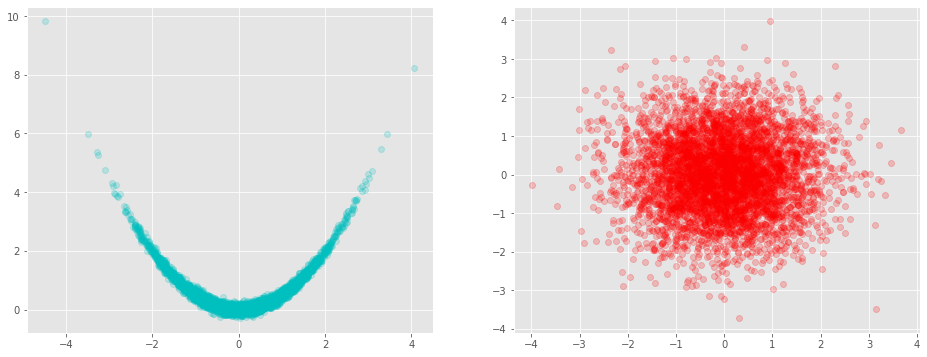

In [2]:
# Draw samples from both the target and the reference/latent space
num_samples = 5000
target = RotatedBanana(num_samples, 0.0)
latent = tf.random.normal([num_samples,2],mean=0.0,stddev=1.0)

# Plot them
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121); ax2 = plt.subplot(122);
ax1.plot(target[:,0], target[:,1], 'co', alpha = .2)
ax2.plot(latent[:,0], latent[:,1], 'ro', alpha = .2)

In [3]:
# Create model object and optimizer
def CreateModel(optimizer, latent_samples):
    nvp = NVP(num_layers=4, neuron_list=[75,75])
    nvp.compile(optimizer)
    # Perform a forward pass to initialize variables
    _ = nvp(latent)
    return nvp

opt = tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-06)

nvp = CreateModel(opt, latent)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
`AffineScalar` bijector is deprecated; please use `tfb.Shift(loc)(tfb.Scale(...))` instead.


In [4]:
# Setup checkpoints
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [5]:
# Define training options
n_epochs = 150
batch_size = 50

# Put the target data in a format the tf likes.
dataset = tf.data.Dataset.from_tensor_slices(target)
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

# Train the model with the new callback
nvp.batch_norm_mode(True)
nvp.fit(dataset, epochs=n_epochs, callbacks=[cp_callback])  # Pass callback to training

# Set the training variables to not update when doing passes
nvp.batch_norm_mode(False)

Epoch 1/150
 94/100 [===========================>..] - ETA: 0s - negative likelihood: 2.0927
Epoch 00001: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 4ms/step - negative likelihood: 2.0983
Epoch 2/150
 97/100 [============================>.] - ETA: 0s - negative likelihood: 2.0152
Epoch 00002: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 4ms/step - negative likelihood: 2.0134
Epoch 3/150
 93/100 [==========================>...] - ETA: 0s - negative likelihood: 1.9300
Epoch 00003: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 5ms/step - negative likelihood: 1.9376
Epoch 4/150
 90/100 [==========================>...] - ETA: 0s - negative likelihood: 1.8822
Epoch 00004: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 4ms/step - negative likelihood: 1.8830
Epoch 5/150
 92/100 [==========================>...] - ETA: 0s - negative likelihood: 1.8021
Epo

 97/100 [============================>.] - ETA: 0s - negative likelihood: 0.7443
Epoch 00037: saving model to training_1/cp.ckpt
100/100 [==============================] - 1s 6ms/step - negative likelihood: 0.7440
Epoch 38/150
 94/100 [===========================>..] - ETA: 0s - negative likelihood: 0.7397
Epoch 00038: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 4ms/step - negative likelihood: 0.7365
Epoch 39/150
 92/100 [==========================>...] - ETA: 0s - negative likelihood: 0.7273
Epoch 00039: saving model to training_1/cp.ckpt
100/100 [==============================] - 1s 5ms/step - negative likelihood: 0.7338
Epoch 40/150
 92/100 [==========================>...] - ETA: 0s - negative likelihood: 0.7069
Epoch 00040: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 4ms/step - negative likelihood: 0.7236
Epoch 41/150
 97/100 [============================>.] - ETA: 0s - negative likelihood: 0.7167
Epoch 00041

 90/100 [==========================>...] - ETA: 0s - negative likelihood: 0.5681
Epoch 00073: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 5ms/step - negative likelihood: 0.5768
Epoch 74/150
 99/100 [============================>.] - ETA: 0s - negative likelihood: 0.5822
Epoch 00074: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 4ms/step - negative likelihood: 0.5814
Epoch 75/150
 86/100 [========================>.....] - ETA: 0s - negative likelihood: 0.5799
Epoch 00075: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 4ms/step - negative likelihood: 0.5721
Epoch 76/150
 94/100 [===========================>..] - ETA: 0s - negative likelihood: 0.5679
Epoch 00076: saving model to training_1/cp.ckpt
100/100 [==============================] - 1s 6ms/step - negative likelihood: 0.5701
Epoch 77/150
 96/100 [===========================>..] - ETA: 0s - negative likelihood: 0.5687
Epoch 00077

 94/100 [===========================>..] - ETA: 0s - negative likelihood: 0.5423
Epoch 00109: saving model to training_1/cp.ckpt
100/100 [==============================] - 1s 5ms/step - negative likelihood: 0.5520
Epoch 110/150
 91/100 [==========================>...] - ETA: 0s - negative likelihood: 0.5576
Epoch 00110: saving model to training_1/cp.ckpt
100/100 [==============================] - 1s 5ms/step - negative likelihood: 0.5578
Epoch 111/150
 98/100 [============================>.] - ETA: 0s - negative likelihood: 0.5438
Epoch 00111: saving model to training_1/cp.ckpt
100/100 [==============================] - 1s 5ms/step - negative likelihood: 0.5454
Epoch 112/150
 99/100 [============================>.] - ETA: 0s - negative likelihood: 0.5537
Epoch 00112: saving model to training_1/cp.ckpt
100/100 [==============================] - 1s 5ms/step - negative likelihood: 0.5502
Epoch 113/150
 91/100 [==========================>...] - ETA: 0s - negative likelihood: 0.5400
Epoch 0

Epoch 145/150
 89/100 [=========================>....] - ETA: 0s - negative likelihood: 0.5302
Epoch 00145: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 5ms/step - negative likelihood: 0.5248
Epoch 146/150
 93/100 [==========================>...] - ETA: 0s - negative likelihood: 0.5251
Epoch 00146: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 5ms/step - negative likelihood: 0.5232
Epoch 147/150
 99/100 [============================>.] - ETA: 0s - negative likelihood: 0.5275
Epoch 00147: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 5ms/step - negative likelihood: 0.5239
Epoch 148/150
 96/100 [===========================>..] - ETA: 0s - negative likelihood: 0.5183
Epoch 00148: saving model to training_1/cp.ckpt
100/100 [==============================] - 0s 5ms/step - negative likelihood: 0.5247
Epoch 149/150
 92/100 [==========================>...] - ETA: 0s - negative likelihood: 

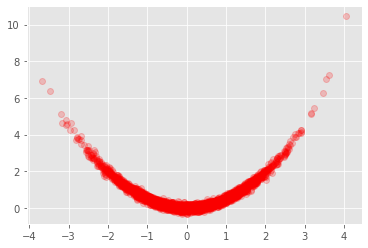

In [6]:
# Plot to make sure it worked
forward_pass = nvp(tf.random.normal([num_samples,2],mean=0.0,stddev=1.0))
plt.plot(forward_pass[:, 0], forward_pass[:, 1], 'ro', alpha=.2)

## Loading the saved model
Now, we demonstrate how to load the saved model.

In [7]:
# List checkpoints
ls {checkpoint_dir}

SyntaxError: invalid syntax (<ipython-input-7-728d1c9ce069>, line 2)

In [ ]:
# Create new model object to load the data into 
unsaved_nvp = CreateModel(opt, latent)

# First, show that it is untrained
forward_pass = unsaved_nvp(tf.random.normal([num_samples,2],mean=0.0,stddev=1.0))
plt.plot(forward_pass[:, 0], forward_pass[:, 1], 'ro', alpha=.2)

In [ ]:
# Now, load the weights
unsaved_nvp.load_weights(checkpoint_path)

# It should be trained
forward_pass = unsaved_nvp(tf.random.normal([num_samples,2],mean=0.0,stddev=1.0))
plt.plot(forward_pass[:, 0], forward_pass[:, 1], 'ro', alpha=.2)